In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
dta = sm.datasets.webuse('lutkepohl2', 'https://www.stata-press.com/data/r12/')
dta.index = dta.qtr
dta.index.freq = dta.index.inferred_freq
endog = dta.loc['1960-04-01':'1978-10-01', ['dln_inv', 'dln_inc', 'dln_consump']]

In [9]:
endog.head()

,dln_inv,dln_inc,dln_consump
qtr,,,
1960-04-01,-0.005571,0.030570,0.014355
1960-07-01,0.032970,0.042111,0.030411
1960-10-01,0.037139,0.016360,0.031749
1961-01-01,0.094363,0.031939,0.024257
1961-04-01,-0.043591,0.021381,-0.002181


In [3]:
mod = sm.tsa.VARMAX(endog[['dln_inv', 'dln_inc']], order=(1,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                             Statespace Model Results                             
Dep. Variable:     ['dln_inv', 'dln_inc']   No. Observations:                   75
Model:                         VARMA(1,1)   Log Likelihood                 354.284
                              + intercept   AIC                           -682.568
Date:                    Mon, 01 Mar 2021   BIC                           -652.441
Time:                            19:15:06   HQIC                          -670.538
Sample:                        04-01-1960                                         
                             - 10-01-1978                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.02, 0.05   Jarque-Bera (JB):         10.85, 14.13
Prob(Q):                        0.90, 0.82   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.43, 0.91   Skew:                      0.00, -0.46
P

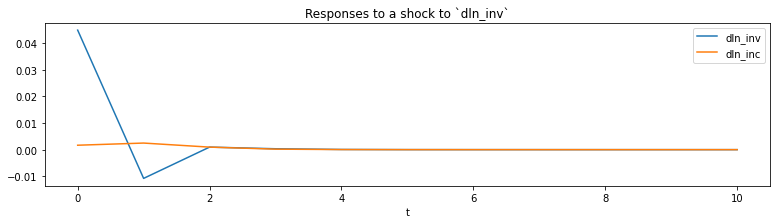

In [4]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

In [ ]:
VARMAXResults.forecast(steps=1, **kwargs)¶